In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st 
import io
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [141]:
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv"
df = pd.read_csv(path)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [142]:
df = df.rename(columns={"medv":"price"})
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [143]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,507,507,507,507,507,507,507,507,507,507,507,507,507,507
unique,505,27,77,3,82,447,357,413,10,67,47,358,456,230
top,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24,666,20.2,396.9,7.79,50.0
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  price    507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [145]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

### Da una visione generale del database, mi accorgo che all'ultima riga ci sono delle stringhe che invalidano il dtype delle feature. La droppo

In [146]:
df = df[:-1]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     506 non-null    object
 1   zn       506 non-null    object
 2   indus    506 non-null    object
 3   chas     506 non-null    object
 4   nox      506 non-null    object
 5   rm       506 non-null    object
 6   age      506 non-null    object
 7   dis      506 non-null    object
 8   rad      506 non-null    object
 9   tax      506 non-null    object
 10  ptratio  506 non-null    object
 11  b        506 non-null    object
 12  lstat    506 non-null    object
 13  price    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [148]:
df = df.astype(float)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: >

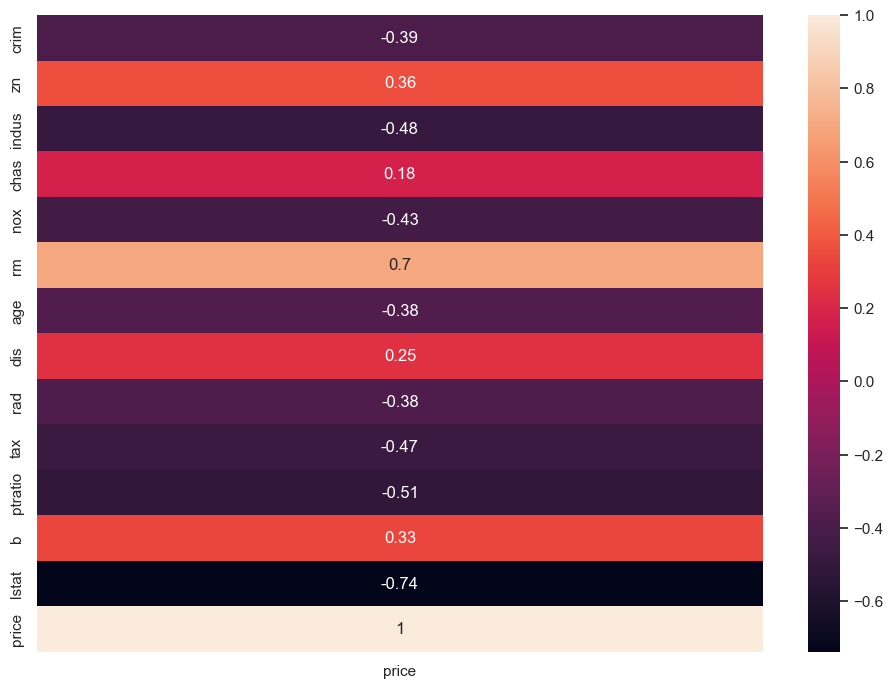

In [150]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlat = df.corr()
sns.heatmap(correlat[["price"]],annot=True)

In [151]:
threshold = 0.5
correl_columns = correlat[["price"]][abs(correlat[["price"]]) >=  threshold]
correl_columns = correl_columns.dropna().drop("price")
correl_columns


,price
rm,0.695360
ptratio,-0.507787
lstat,-0.737663


In [152]:
correl_columns.index.tolist()

['rm', 'ptratio', 'lstat']

In [153]:
target = "price"
X = df[correl_columns.index.tolist()]
y = df["price"]
X

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


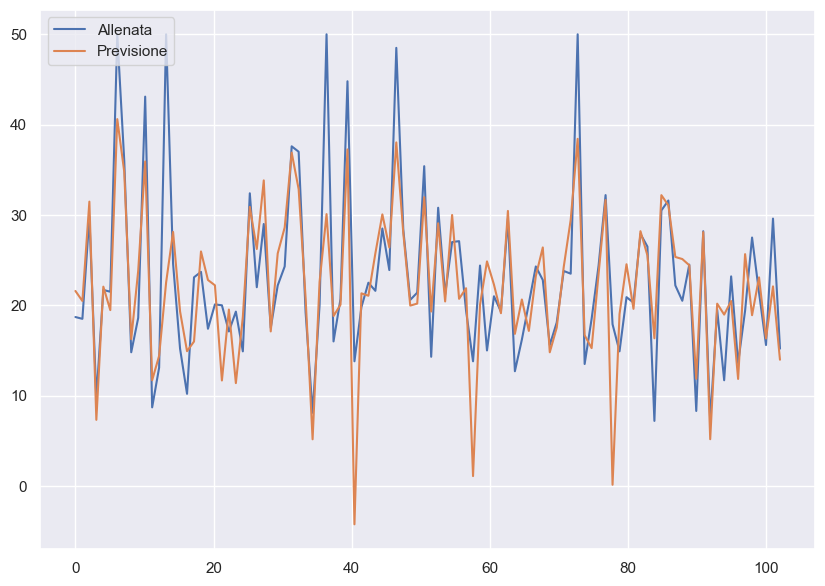

In [154]:
X_train,X_test,y_train,y_test= train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=667
                                                )
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
length = y_pred.shape[0]
k = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(k,y_test, label="Allenata")
plt.plot(k,y_pred, label="Previsione")
plt.legend(loc=2);

In [155]:
X_test.to_csv("X_test.csv", index=False)

## R2_score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error 

### dopo diversi test di threshold, noto che mi basta usare le 3 feature più significative e ottengo errori simili rispetto a quando ne utilizzavo 5. Setto il valore a 0.5 di conseguenza

In [156]:
from  sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
r2score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)

print('R2_score:',r2score)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)


R2_score: 0.6006320504859002
MAE: 4.012251060384977
MSE: 35.72419395348631
RMSE: 5.976971971950873


## Export model with Joblib

In [157]:
import joblib

## to save a model
joblib.dump(model,'regression_test.pkl')

['regression_test.pkl']